___

<a href='http://www.dourthe.tech'> <img src='Dourthe_Technologies_Headers.png' /></a>
___
<center><em>For more information, visit <a href='http://www.dourthe.tech'>www.dourthe.tech</a></em></center>

# Face Detection using Haar Cascades and Tracking APIs

___
## Objective
Build an algorithm enabling the automated and semi-automated detection/tracking of faces on images and videos using the functionality of Haar cascades and various tracking APIs.

___
## Background
### Haar cascades
Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, “Rapid Object Detection using a Boosted Cascade of Simple Features” in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

_For more details on Haar cascades, visit https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html_

### Tracking APIs
Over the years, many tracking methods have been developed and deployed using Application Programming Interfaces (APIs). Several of which can be used for automated face detection. Here are some examples:

| METHOD | DESCRIPTION | PROS | CONS |
|:---|:---|:---|:---|
| BOOSTING | This is a real-time object tracking based on a novel on-line version of the AdaBoost algorithm. The classifier uses the surrounding background as negative examples in update step to avoid the drifting problem. _For more details, visit https://docs.opencv.org/3.4/d1/d1a/classcv_1_1TrackerBoosting.html#details_ | Well known algorithm that has been widely tested and used | Unable to report failed tracking |
| MIL | The Multiple Instance Learning (MIL) algorithm trains a classifier in an online manner to separate the object from the background. The MIL algorithm avoids the drift problem for a robust tracking. _For more details, visit https://docs.opencv.org/3.4/d0/d26/classcv_1_1TrackerMIL.html_ | Overall good tracking performance and less drafting compared to the Boosting method | Unable to report failed tracking and re-adjust from object obstruction |
| KCF | The Kernelized Correlation Filter (KCF) is a tracking framework that utilizes properties of circulant matrix to enhance the processing speed. _For more details, visit https://docs.opencv.org/3.4/d2/dff/classcv_1_1TrackerKCF.html_ | Improve version of the MIL algorithm | Unable to re-adjust from object obstruction |
| TDL | The Tracking, Learning and Detection (TDL) is a tracking framework that explicitly decomposes the long-term tracking task into tracking, learning and detection. The tracker follows the object from frame to frame. The detector localizes all appearances that have been observed so far and corrects the tracker if necessary. The learning estimates detector's errors and updates it to avoid these errors in the future. _For more details, visit https://docs.opencv.org/3.4/dc/d1c/classcv_1_1TrackerTLD.html_ | Good with obstruction and large scale changes (object going further/closer) | Often leads to false positives when recovering from obstruction or scale changes |
| MEDIAN FLOW | The tracker is suitable for very smooth and predictable movements when object is visible throughout the whole sequence. It's quite and accurate for this type of problems (in particular, it was shown by authors to outperform MIL). _For more details, visit https://docs.opencv.org/3.4/d7/d86/classcv_1_1TrackerMedianFlow.html_ | Reports failed tracking and best performance on smooth/predictable movements | Average performance on fast moving objects |
| MOSSE | The Minimum Output Sum of Squared Error (MOSSE) is a visual object tracking method using adaptive correlation filters. _For more details, visit https://docs.opencv.org/3.4/d0/d02/classcv_1_1TrackerMOSSE.html_ | Detects object obstruction, robust to variations in lighting, scale, pose, and non-rigid deformations | Reduced performance compared to deep learning methods |
| GOTURN | Generic Object Tracking Using Regression Networks (GOTURN) is a tracker based on Convolutional Neural Networks (CNN). While taking all advantages of CNN trackers, GOTURN is much faster due to offline training without online fine-tuning nature. _For more details, visit https://docs.opencv.org/3.4/d7/d4c/classcv_1_1TrackerGOTURN.html_ | Robust to viewpoint changes, lighting changes and deformations | Unable to re-adjust from object obstruction |
| CSRT | The Discriminative Correlation Filter with Channel and Spatial Reliability (DCF-CSR) uses the spatial reliability map to adjut filter to the selected region (or region of interest, ROI). This ensures enlarging and localization of the ROI and improves tracking for non-rectangular objects. _For more details, visit https://docs.opencv.org/3.4/d2/da2/classcv_1_1TrackerCSRT.html_ | Detects object obstruction, high accuracy and computing speed compared to deep learning method | |


___
## Algorithm preview
In the code below, we show how to run the Haar cascade face detection method and different tracking APIs on single/group photos, as well as on imported video files and live webcam feed.

**Example on single person (automated - Haar cascade)**
<img src="img/example_single.jpg" alt="Drawing" style="width: 500px;"/>

**Example on group photo (automated - Haar cascade)**
<img src="img/example_group.jpg" alt="Drawing" style="width: 500px;"/>

**Example on video file (semi-automated - Tracking API)**
<img src="img/example_video.jpg" alt="Drawing" style="width: 500px;"/>

___
## Libraries Imports
### Data manipulation and analysis

In [1]:
import os
import numpy as np

### Data visualization

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

### Computer vision

In [3]:
import cv2

___
## Data Import and Visualization
**There are two subfolders in the main _data_ folder:**

* single: contains 10 portrait images of young women and men
* group: contains 10 group photos

We will start by creating two lists containing the filenames of all images contained in these two subfolders.

In [4]:
single = os.listdir('data/single')
group = os.listdir('data/group')

**Let's read and display the first image of each subfolder.**

Note that using the _imshow_ method from the cv2 library require to open a separate window. In order to visualize the image within the notebook, we will use _imshow_ method from matplotlib instead.

However, since cv2 reads image with a Blue, Green, Red (BGR) color convention, we need to use the cvtColor method from cv2 to convert the color channels from BGR to Red, Green, Blue (RGB).

In [5]:
single_img = cv2.imread('data/single/' + single[0])
group_img = cv2.imread('data/group/' + group[0])

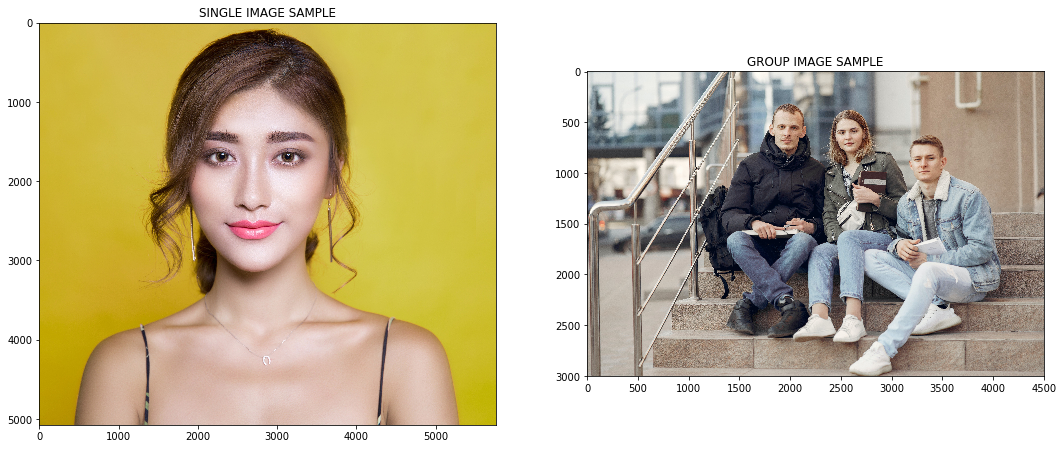

In [6]:
plt.figure(figsize=(18,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB))
plt.title('SINGLE IMAGE SAMPLE')
plt.subplot(122)
plt.imshow(cv2.cvtColor(group_img, cv2.COLOR_BGR2RGB))
plt.title('GROUP IMAGE SAMPLE')
plt.show()

___
## Haar Cascade Face Detection
### Cascade files import
**First, we need to import the pre-trained cascade files (.xml format) that will be used to detect faces.**

Let's start by creating a list containing the filenames of all available cascade files in the _haar-cascades_ folder.

In [7]:
cascades = os.listdir('haar-cascades/')

In [8]:
print(cascades)

['haarcascade_eye.xml', 'haarcascade_eye_tree_eyeglasses.xml', 'haarcascade_frontalcatface.xml', 'haarcascade_frontalcatface_extended.xml', 'haarcascade_frontalface_alt.xml', 'haarcascade_frontalface_alt2.xml', 'haarcascade_frontalface_alt_tree.xml', 'haarcascade_frontalface_default.xml', 'haarcascade_fullbody.xml', 'haarcascade_lefteye_2splits.xml', 'haarcascade_licence_plate_rus_16stages.xml', 'haarcascade_lowerbody.xml', 'haarcascade_profileface.xml', 'haarcascade_righteye_2splits.xml', 'haarcascade_russian_plate_number.xml', 'haarcascade_smile.xml', 'haarcascade_upperbody.xml']


**In the context of frontal face detection, we will use the pre-trained _haarhaarcascade_frontalface_default.xml_ file.**

Note that this specifc cascade may not work as well on faces that are not directly facing the camera.

In [9]:
face_cascade = cv2.CascadeClassifier('haar-cascades/haarcascade_frontalface_default.xml')

### Define face detection function
**Now, let's create a function that will apply the Haar cascade face detection model and draw a rectangle on the image that indicates where the model detected a face.**

In [10]:
def cascade_face_detection(img):
    
    img_copy = img.copy()
  
    face_rects = face_cascade.detectMultiScale(img_copy, scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(img_copy, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return img_copy

### Apply function and display result
**Let's apply the cascade_face_detection function to a random image from the _single_ subfolder.**

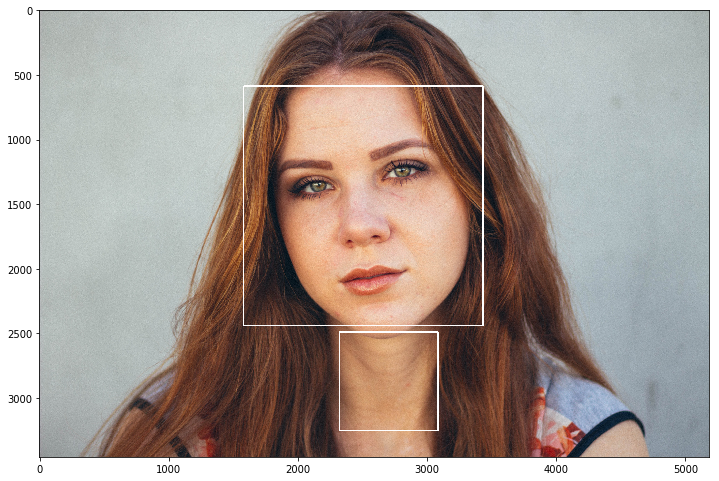

In [30]:
rand_idx = np.random.randint(0, len(single))
img = cv2.imread('data/single/' + single[rand_idx])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

single_test = cascade_face_detection(img)

plt.figure(figsize=(12,10))
plt.imshow(single_test)
plt.show()

Note that the function detected a face where her neck is. To improve model performance, parameters such as _scaleFactor_ and _minNeighbors_ can be adjusted.

**Now, let's try it on a random image from the _group_ subfolder.**

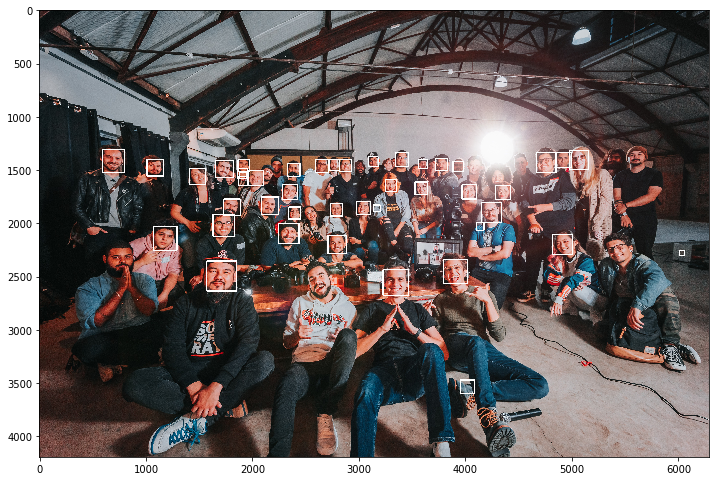

In [33]:
rand_idx = np.random.randint(0, len(group))
img = cv2.imread('data/group/' + group[rand_idx])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

group_test = cascade_face_detection(img)

plt.figure(figsize=(12,10))
plt.imshow(group_test)
plt.show()

### Test on imported video
**Let's try to load a random video of people walking and apply the cascade_face_detection function to display the live face dectection functionality of the Haar cascade method.**

First, we will import the video and define resizing parameters to ensure the full video can be seen on a laptop screen when displayed.

In [ ]:
cap = cv2.VideoCapture('data/video/Video Of People Walking.mp4')

# Define resize ratio as a percentage of the original size
resize_ratio = 70
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * resize_ratio / 100)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * resize_ratio / 100)
dim = (width, height)

**Display video with live cascade face detection.**

To exit the window and stop the live feed, press the 'Esc' key.

In [ ]:
while True: 
    
    ret, frame = cap.read(0) 
     
    frame = cv2.resize(cascade_face_detection(frame), dim, interpolation = cv2.INTER_AREA)
 
    cv2.imshow('Haar Cascade Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

### Test on live video
**Here, we will create a function that turns on your local webcam and displays the live feedback on on seperate window. We will also apply the cascade_face_detection to that video feed to show the live face detection functionality of the Haar cascade face detection method.**

To exit the window and stop the live feed, press the 'Esc' key.

In [ ]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = cascade_face_detection(frame)
 
    cv2.imshow('Haar Cascade Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

___
## Tracking APIs for Face Detection
### Choose tracker
**Select tracker based on the following options:**

| METHOD | CODE TO COPY |
| :--- | :--- |
| BOOSTING | tracker = cv2.TrackerBoosting_create() |
| MIL | tracker = cv2.TrackerMIL_create() |
| KCF | tracker = cv2.TrackerKCF_create() |
| TLD | tracker = cv2.TrackerTLD_create() |
| MEDIAN FLOW | tracker = cv2.TrackerMedianFlow_create() |
| MOSSE | tracker = cv2.TrackerMOSSE_create() |
| GOTURN | tracker = cv2.TrackerGOTURN_create() |
| CSRT | tracker = cv2.TrackerCSRT_create() |

In [34]:
tracker = cv2.TrackerCSRT_create()

**Isolate tracker's name as a string so so it can be looped over when multiple trackers need to be created.**

In [35]:
tracker_name = str(tracker).split()[0][1:]

### Import video
**We will use the same video used when testing the Haar cascade method.**

In [36]:
cap = cv2.VideoCapture('data/video/Video Of People Walking.mp4')

# Define resize ratio as a percentage of the original size
resize_ratio = 50
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * resize_ratio / 100)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * resize_ratio / 100)
dim = (width, height)

### Region of interest (ROI) selection
**Here, the first frame of the video will de display. Then, the following steps can be used to select ROIs:**

* **Step 1:** Select ROIs by defining rectangles around each object to track (here, faces)
* **Step 2:** Double press 'Enter' to validate selection
* **Step 3:** Repeat until all ROIs have been defined
* **Step 4:** Double press 'Esc' to close window

_Note: for each selected ROI, a random color will be defined to allow each tracker to be displayed in a different color._

In [37]:
# Initialize empty ROIs and color
rois = []
colors = []

# Read first frame
ret, frame = cap.read()

# Resize first frame
frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)

# Select ROIs using the selectROI function called in a loop to allow multiple ROIs selection
print("Press 'Esc' to quit ROI selection")
print("Press 'Enter' or any other key to confirm selection and select next object")
i = 0
while True:
    roi = cv2.selectROI(frame, fromCenter=False, showCrosshair=True)
    if roi != (0,0,0,0):
        rois.append(roi)
        colors.append((np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)))  
        exec('tracker' + str(i) + ' = cv2.' + tracker_name + '_create()')
        exec('ret = tracker' + str(i) + '.init(frame, roi)')
        i += 1
    
    # Exit if 'Esc' pressed
    k = cv2.waitKey(0) & 0xFF
    if (k == 27): 
        break

cv2.destroyAllWindows()

print('\nNumber of selected ROIs: ', len(rois))   

Press 'Esc' to quit ROI selection
Press 'Enter' or any other key to confirm selection and select next object

Number of selected ROIs:  13


### Display tracking results
**Apply trackers to the video frame by frame and display tracking using different colors for each tracker.**

In [38]:
while True:
    
    # Read new frame
    ret, frame = cap.read()
    
    # Resize new frame
    frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    
    # Loop through each tracker
    for i, roi in enumerate(rois):
        
        # Update tracker
        exec('success, roi = tracker' + str(i) + '.update(frame)')
        
        # Unpack tracker's coordinates to draw rectangle
        (x,y,w,h) = tuple(map(int,roi))
    
        # Draw rectangle on frame
        if success:
            p1 = (x, y)
            p2 = (x+w, y+h)
            cv2.rectangle(frame, p1, p2, colors[i], 3)

    # Display result
    cv2.imshow(tracker_name + ' Face Detection', frame)

    # Exit if 'Esc' pressed
    k = cv2.waitKey(1) & 0xff
    if k == 27 : 
        break

cv2.destroyAllWindows()

### MultiTracker built-in method
**OpenCV has a built-in method called _MultiTracker_ which allows us to create a _MultiTracker_ object, add multiple trackers to it and update this object in a single line of code (instead of using a for loop as in shown above).**

The code belows attempted to implement a _MultiTracker_ object to perform the exact same operation, however, the code seem to generate errors or only show the first tracker, which is why the code presented above (which works) was introduced.

In [ ]:
# Initialize empty ROIs and color
rois = []
colors = []

# Read first frame
ret, frame = cap.read()

# Resize first frame
frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)

# Create MultiTracker object
multiTracker = cv2.MultiTracker_create()

# Select ROIs using the selectROI function called in a loop to allow multiple ROIs selection
print("Press 'Esc' to quit ROI selection")
print("Press 'Enter' or any other key to confirm selection and select next object")
while True:
    roi = cv2.selectROI(frame, False)
    rois.append(roi)
    colors.append((np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)))  
    multiTracker.add(tracker, frame, roi)
    
    # Exit if 'Esc' pressed
    k = cv2.waitKey(0) & 0xFF
    if (k == 27): 
        break

cv2.destroyAllWindows()

print('Number of selected ROIs: ', len(rois))    
        
while True:
    
    success, frame = cap.read()
    
    if not success:
        break
    
    # Resize first frame
    frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)

    # get updated location of objects in subsequent frames
    success, roi_rect = multiTracker.update(frame)

    # draw tracked objects
    if success:
        for i, roi in enumerate(roi_rect):
            (x, y, w, h) = [int(i) for i in roi] 
            p1 = (x, y)
            p2 = (x+w, y+h)
            cv2.rectangle(frame, p1, p2, colors[i], 3)
    else:
        # Tracking failure
        cv2.putText(frame, "Failure to Detect Tracking!!", (100,200), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),3)

    # show frame
    cv2.imshow(tracker_name + ' Face Dectection', frame)

    # Exit if ESC pressed
    k = cv2.waitKey(1) & 0xFF
    if k == 27: 
        break
        
cv2.destroyAllWindows()